In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#import datasets
testdf=pd.read_csv('C:/Users/HP/Desktop/datasets/titanic/test.csv')
traindf=pd.read_csv('C:/Users/HP/Desktop/datasets/titanic/train.csv')

In [3]:
#view the train and test_df
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#check datatypes of columns
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#number of unique values of every columns
traindf.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
traindf=traindf.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [8]:
#change cols dtype to categorical
cols=['Pclass','Embarked']
traindf[cols]=traindf[cols].astype('category')

In [9]:
#check for nulls
traindf.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
#impute the missing age values with the mean age and drop the remaining two rows with nulls
avg_age=traindf['Age'].mean()
traindf['Age'] = traindf['Age'].fillna(avg_age)
traindf=traindf.dropna()

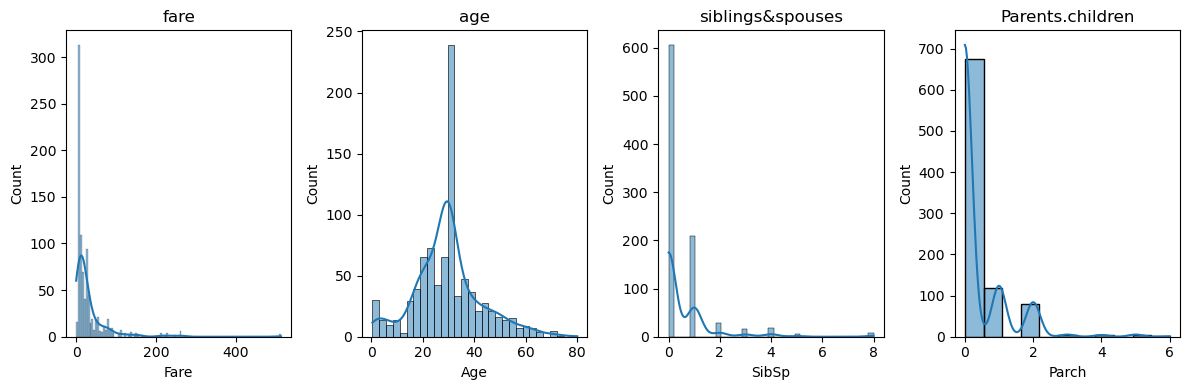

In [11]:
#plot the numerical colmns to check for outliers
fig,axes=plt.subplots(nrows=1,ncols=4,figsize = (12,4))
sns.histplot(traindf['Fare'],ax=axes[0],kde=True)
axes[0].set_title('fare')
sns.histplot(traindf['Age'],ax=axes[1],kde=True)
axes[1].set_title('age')
sns.histplot(traindf['SibSp'],ax=axes[2],kde=True)
axes[2].set_title('siblings&spouses')
sns.histplot(traindf['Parch'],ax=axes[3],kde=True)
axes[3].set_title('Parents.children')
plt.tight_layout()
plt.show()

In [12]:
#scale the numeric columns
num_cols=['Age','Fare','SibSp','Parch']
mm_scaler = MinMaxScaler()
traindf[num_cols]=mm_scaler.fit_transform(traindf[num_cols])

In [13]:
categorycols=['Pclass','Sex','Embarked']

In [14]:
#encode the categorical variables using pandas get_dummies
traindf=pd.get_dummies(traindf,prefix_sep='_',drop_first=True)

In [15]:

testdf.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
#perform the same transformations to the test dataframe
testdf=testdf.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

mean_age = testdf['Age'].mean()
testdf['Age']=testdf['Age'].fillna(mean_age)

avg_fare=testdf['Fare'].mean()
testdf['Fare'] = testdf['Fare'].fillna(avg_fare)

testdf['Pclass']=testdf['Pclass'].astype('category')

testdf[num_cols]=mm_scaler.fit_transform(testdf[num_cols])
testdf=pd.get_dummies(testdf,prefix_sep='_',drop_first=True)

In [17]:
#define the x and y dataframes and split the data into test and train
X=traindf.drop(['Survived'],axis=1)
Y=traindf['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=43)

In [18]:
#initiate the logistic model and fit it to the training data
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [19]:
#import model evaluation metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,auc,roc_curve,f1_score,accuracy_score

In [20]:
#use the fitted model to get predictions on the test data
preds = logistic_model.predict(X_test)

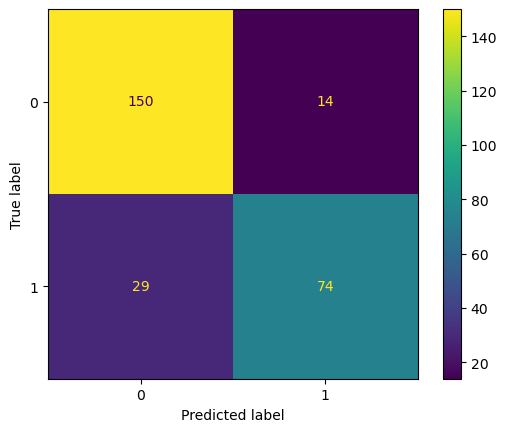

In [21]:
#plot confusion matrix
cm=confusion_matrix(Y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [22]:
logistic_model.score(X_test,Y_test)

0.8389513108614233

In [23]:
#f1_score
f1 = f1_score(Y_test,preds)
f1

0.7748691099476439

In [24]:
#finding probabilities of the predctions 
probs = logistic_model.predict_proba(X_test)
#using the roc_curve function to find the fpr,tpr
fpr,tpr,threshold = roc_curve(Y_test,probs[:,1],pos_label=1)
#using auc function to find the area under the curve
Auc = auc(fpr,tpr)

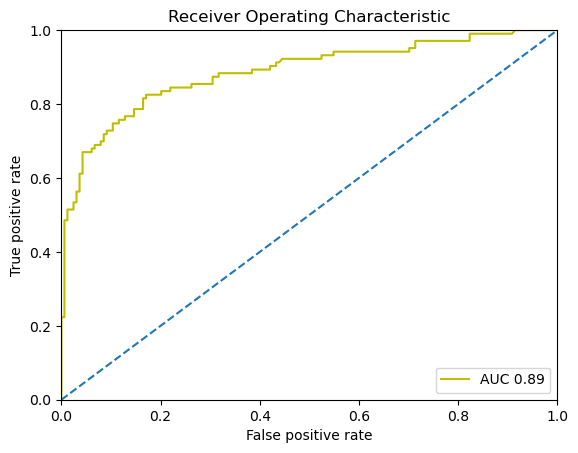

In [25]:
#plot the roc curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'y',label='AUC %0.2f'%Auc)
plt.plot([0,1],[0,1],'--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [26]:
test_preds=logistic_model.predict(testdf)

In [27]:
resultsdf=pd.read_csv('C:/Users/HP/Desktop/datasets/titanic/gender_submission.csv')

In [28]:
resultsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [29]:
resultsdf['Survived']=test_preds

In [30]:
resultsdf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
resultsdf.to_csv('C:/Users/HP/Desktop/titanic_preds.csv',index=False)